# Rule Based Algorithms 

Importing and downloading all the required libraries and packages

In [12]:
! pip install pandas numpy scikit-learn matplotlib kagglehub seaborn streamlit plotly

Importing Libraries

In [13]:
# Required Libraries
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import kagglehub

Loading and preprocessing dataset 

In [14]:
# Step 1: Download the Dataset from Kaggle
path = kagglehub.dataset_download("uciml/mushroom-classification")
dataset_path = f"{path}/mushrooms.csv"

# Step 2: Load the Dataset
data = pd.read_csv(dataset_path)

# Step 3: Display the Dataset
# Print the first few rows of the dataset
print("Dataset Loaded Successfully!")
print("Here are the first 5 rows of the dataset:")
display(data.head())

# Show dataset info
print("\nDataset Information:")
data.info()

# Show a summary of the dataset
print("\nDataset Summary:")
print(data.describe(include='all'))

# Step 4: Preprocess the Dataset
# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(data, drop_first=True)  # Updated to use 'data'

# Define features (X) and target (y)
X = df_encoded.drop('class_p', axis=1)  # 'class_p' indicates poisonous
y = df_encoded['class_p']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert test data to dictionary for rule-based processing
X_test_dict = X_test.to_dict(orient='records')

Dataset Loaded Successfully!
Here are the first 5 rows of the dataset:


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  st

Analysing the code and looking for any patterns between the properties of a mushroom 
and if that helps classify with the mushroom being poisonous or edible

Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

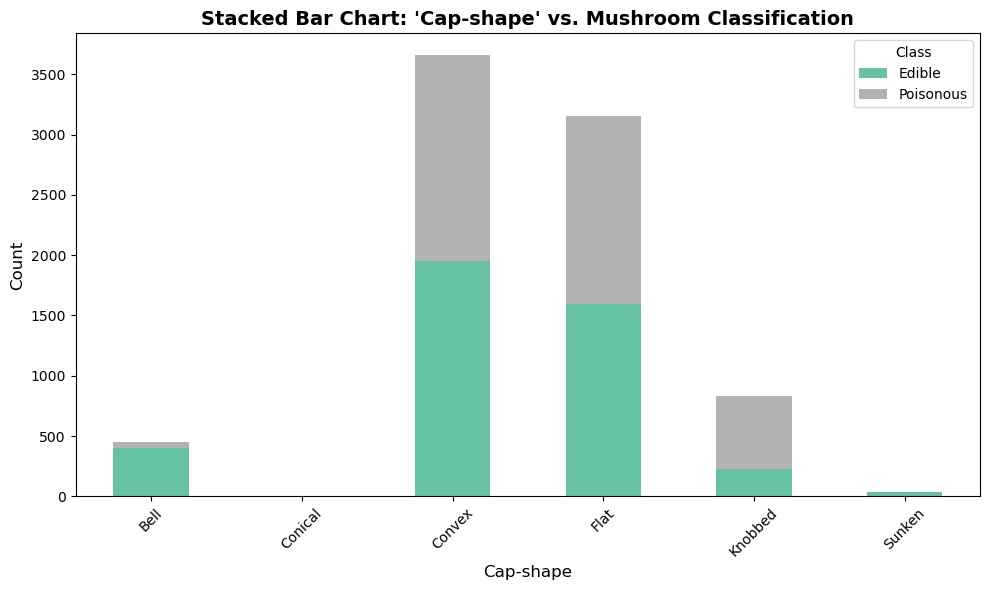

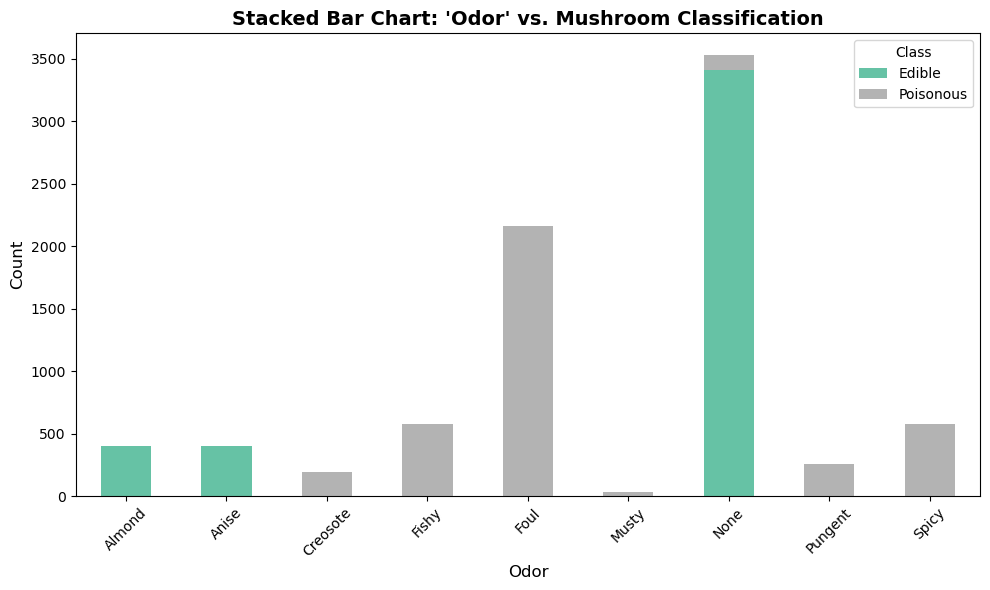

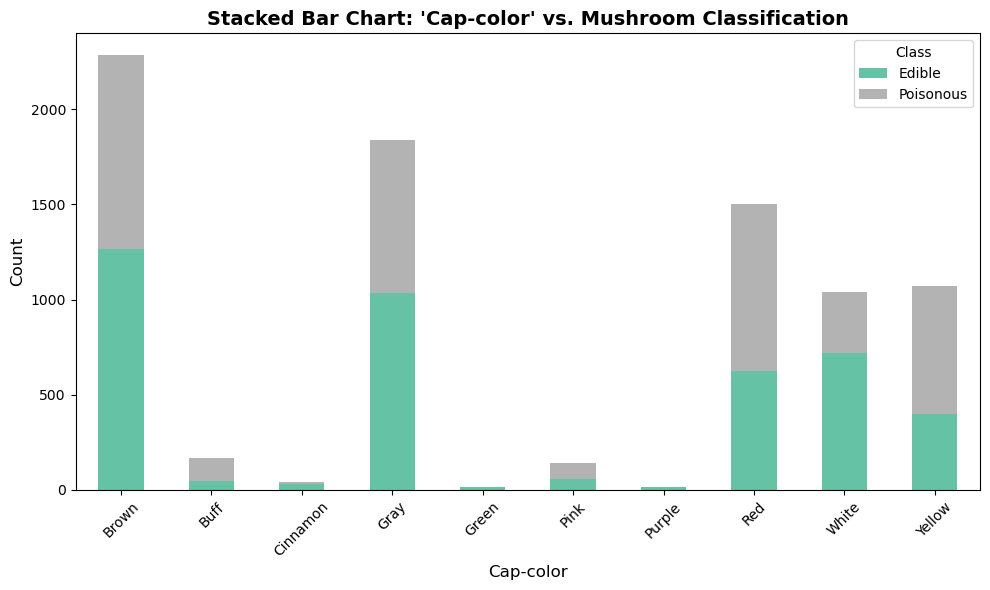

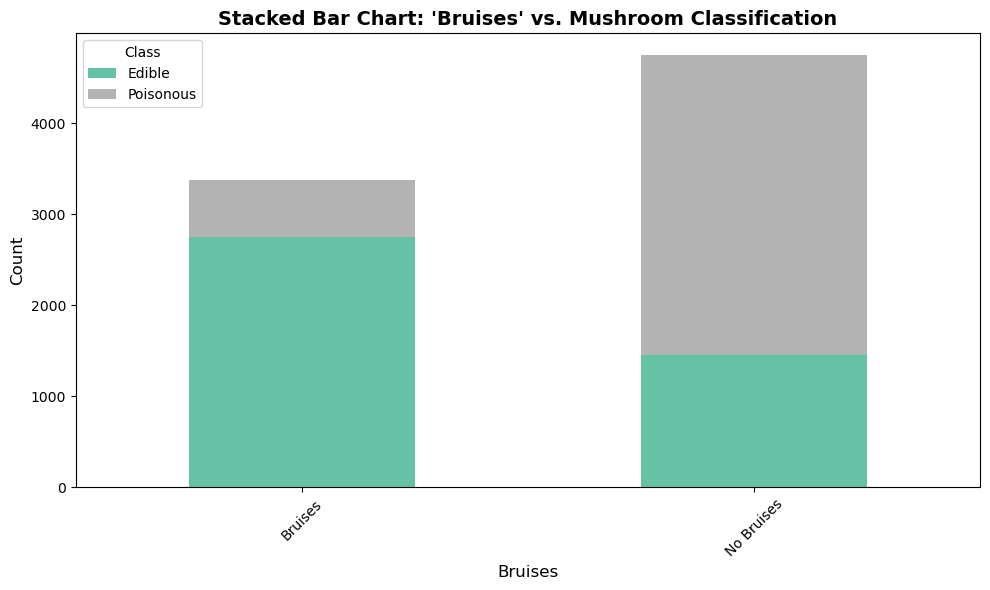

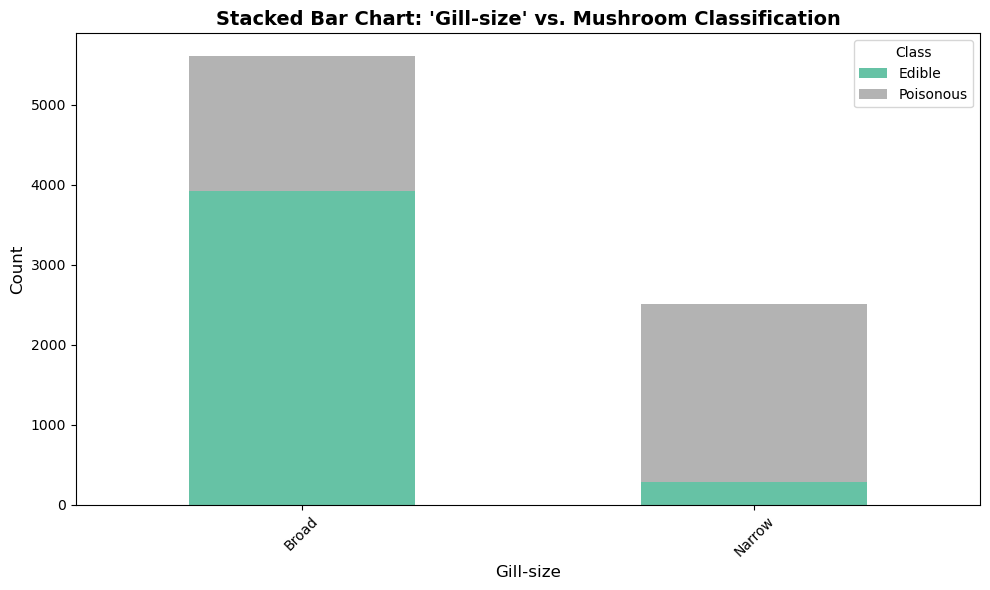

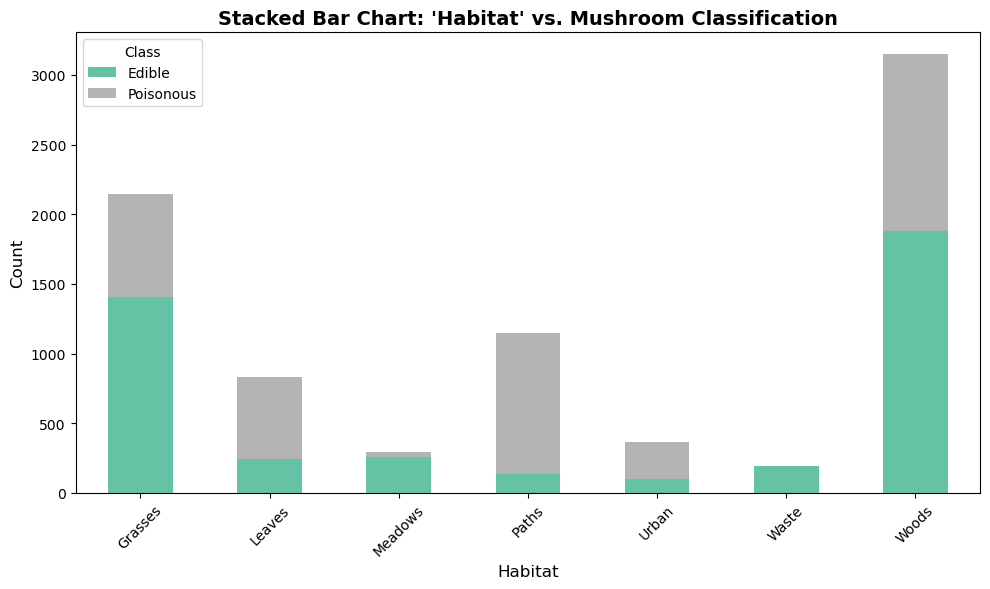

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Define mappings for full descriptions of feature values
feature_mappings = {
    'odor': {
        'a': 'Almond', 'l': 'Anise', 'c': 'Creosote', 'y': 'Fishy',
        'f': 'Foul', 'm': 'Musty', 'n': 'None', 'p': 'Pungent', 's': 'Spicy'
    },
    'cap-shape': {
        'b': 'Bell', 'c': 'Conical', 'x': 'Convex', 'f': 'Flat',
        'k': 'Knobbed', 's': 'Sunken'
    },
    'cap-color': {
        'n': 'Brown', 'b': 'Buff', 'c': 'Cinnamon', 'g': 'Gray', 'r': 'Green',
        'p': 'Pink', 'u': 'Purple', 'e': 'Red', 'w': 'White', 'y': 'Yellow'
    },
    'bruises': {'t': 'Bruises', 'f': 'No Bruises'},
    'gill-size': {'b': 'Broad', 'n': 'Narrow'},
    'habitat': {
        'g': 'Grasses', 'l': 'Leaves', 'm': 'Meadows', 'p': 'Paths',
        'u': 'Urban', 'w': 'Waste', 'd': 'Woods'
    }
}

# Function to map feature values to full descriptions
def map_feature_values(feature):
    """
    Maps abbreviated feature values to full descriptions based on pre-defined mappings.
    """
    if feature in feature_mappings:
        data[feature] = data[feature].map(feature_mappings[feature])

# Function to visualize correlation using stacked bar charts
def visualize_correlation_stacked(feature):
    """
    Visualize the relationship between a categorical feature and mushroom classification (edible/poisonous)
    using a stacked bar chart with full feature descriptions.
    
    Args:
        feature (str): Name of the column to analyze.
    """
    if feature not in data.columns:
        print(f"Feature '{feature}' not found in the dataset!")
        return
    
    # Map feature values to full descriptions if applicable
    map_feature_values(feature)
    
    # Create a pivot table to count occurrences of 'class' per feature value
    feature_class_counts = data.groupby([feature, 'class']).size().unstack(fill_value=0)
    
    # Plot stacked bar chart
    feature_class_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="Set2")
    
    # Add labels and title
    plt.title(f"Stacked Bar Chart: '{feature.capitalize()}' vs. Mushroom Classification", fontsize=14, fontweight='bold')
    plt.xlabel(feature.capitalize(), fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title="Class", labels=["Edible", "Poisonous"])
    
    # Show the plot
    plt.tight_layout()
    plt.show()

# Visualize correlations for specific features using stacked bar charts with full descriptions
features_to_analyze = ['cap-shape', 'odor', 'cap-color', 'bruises', 'gill-size', 'habitat']

for feature in features_to_analyze:
    visualize_correlation_stacked(feature)



Setting rules for forward chaining after distinguishing mushrooms based on general information

Forward Chaining Approach 1: Rule Explanation
This approach focuses on the odor, bruising, cap color, and spore print color as the key factors for classification. The rules are:

Odor-Based Rules:

Mushrooms with a foul or fishy odor are classified as poisonous, as these odors are strong indicators of toxicity in many mushroom species.
Mushrooms with a none or anise odor are classified as edible, as these odors are commonly associated with safe mushrooms.
Bruises and Cap-Color Rule:

Mushrooms that show bruises (indicating a soft or fleshy texture) and have a brown cap color are classified as edible. These characteristics often indicate species that are safe for consumption.
Spore-Print-Color Rule:

Mushrooms with a green spore print color are classified as poisonous, as this color is typically found in highly toxic mushrooms.
Default Rule:

If none of the above rules apply, the mushroom is classified as poisonous. This default approach errs on the side of caution to avoid misclassifying potentially toxic mushrooms.

In [22]:
# Forward Chaining Algorithm 1
def classify_mushroom_v1(data):
    """
    Forward Chaining Approach 1: Classify based on predefined rules.
    """
    if data.get('odor_f', 0) == 1 or data.get('odor_y', 0) == 1:
        return 1  # Poisonous
    if data.get('odor_n', 0) == 1 or data.get('odor_l', 0) == 1:
        return 0  # Edible
    if data.get('bruises_t', 0) == 1 and data.get('cap-color_n', 0) == 1:
        return 0  # Edible
    if data.get('spore-print-color_r', 0) == 1:
        return 1  # Poisonous
    return 1  # Default to Poisonous

Forward Chaining Approach 2: Rule Explanation
This approach uses different features such as habitat, population density, ring type, veil color, and gill characteristics to classify mushrooms. The rules are:

Habitat-Based Rule:

Mushrooms found in urban or waste areas are classified as poisonous, as these environments are more likely to contain toxic species due to pollution or disturbed ecosystems.
Population-Based Rule:

Mushrooms with a clustered or numerous population are classified as edible, as edible mushrooms often grow in groups or large clusters, especially in their natural habitats.
Ring-Type and Veil-Color Rule:

Mushrooms with a pendant ring type (a hanging ring structure) and a white veil color are classified as edible, as these characteristics are associated with certain safe mushroom species.
Gill-Color and Gill-Attachment Rule:

Mushrooms with red gills or free gill attachment (where the gills do not connect to the stalk) are classified as poisonous, as these features are common in toxic mushrooms.
Default Rule:

If none of the above rules apply, the mushroom is classified as poisonous, maintaining a cautious approach.

In [23]:
# Forward Chaining Algorithm 2
def classify_mushroom_v2(data):
    """
    Forward Chaining Approach 2: Classify based on alternative rules.
    """
    if data.get('habitat_u', 0) == 1 or data.get('habitat_w', 0) == 1:
        return 1  # Poisonous
    if data.get('population_c', 0) == 1 or data.get('population_n', 0) == 1:
        return 0  # Edible
    if data.get('ring-type_p', 0) == 1 and data.get('veil-color_w', 0) == 1:
        return 0  # Edible
    if data.get('gill-color_e', 0) == 1 or data.get('gill-attachment_f', 0) == 1:
        return 1  # Poisonous
    return 1  # Default to Poisonous

Evaluating and comparing both of the algorithms and interpreting at the results

In [24]:
# Step 5: Evaluate Both Algorithms

# Measure computational time for Approach 1
start_time_v1 = time.time()
y_pred_v1 = [classify_mushroom_v1(row) for row in X_test_dict]
time_v1 = time.time() - start_time_v1

# Measure computational time for Approach 2
start_time_v2 = time.time()
y_pred_v2 = [classify_mushroom_v2(row) for row in X_test_dict]
time_v2 = time.time() - start_time_v2

# Calculate accuracy and generate reports
accuracy_v1 = accuracy_score(y_test, y_pred_v1)
accuracy_v2 = accuracy_score(y_test, y_pred_v2)

print("\nForward Chaining Approach 1 Metrics")
print(classification_report(y_test, y_pred_v1, zero_division=0))
print(f"Accuracy: {accuracy_v1 * 100:.2f}%")
print(f"Computational Time: {time_v1:.4f} seconds")

print("\nForward Chaining Approach 2 Metrics")
print(classification_report(y_test, y_pred_v2, zero_division=0))
print(f"Accuracy: {accuracy_v2 * 100:.2f}%")
print(f"Computational Time: {time_v2:.4f} seconds")


Forward Chaining Approach 1 Metrics
              precision    recall  f1-score   support

       False       0.93      0.91      0.92      1257
        True       0.91      0.93      0.92      1181

    accuracy                           0.92      2438
   macro avg       0.92      0.92      0.92      2438
weighted avg       0.92      0.92      0.92      2438

Accuracy: 91.96%
Computational Time: 0.0010 seconds

Forward Chaining Approach 2 Metrics
              precision    recall  f1-score   support

       False       0.84      0.71      0.77      1257
        True       0.73      0.85      0.79      1181

    accuracy                           0.78      2438
   macro avg       0.78      0.78      0.78      2438
weighted avg       0.79      0.78      0.78      2438

Accuracy: 77.69%
Computational Time: 0.0020 seconds


Visualising the outputted results and comparing the two different algorithms

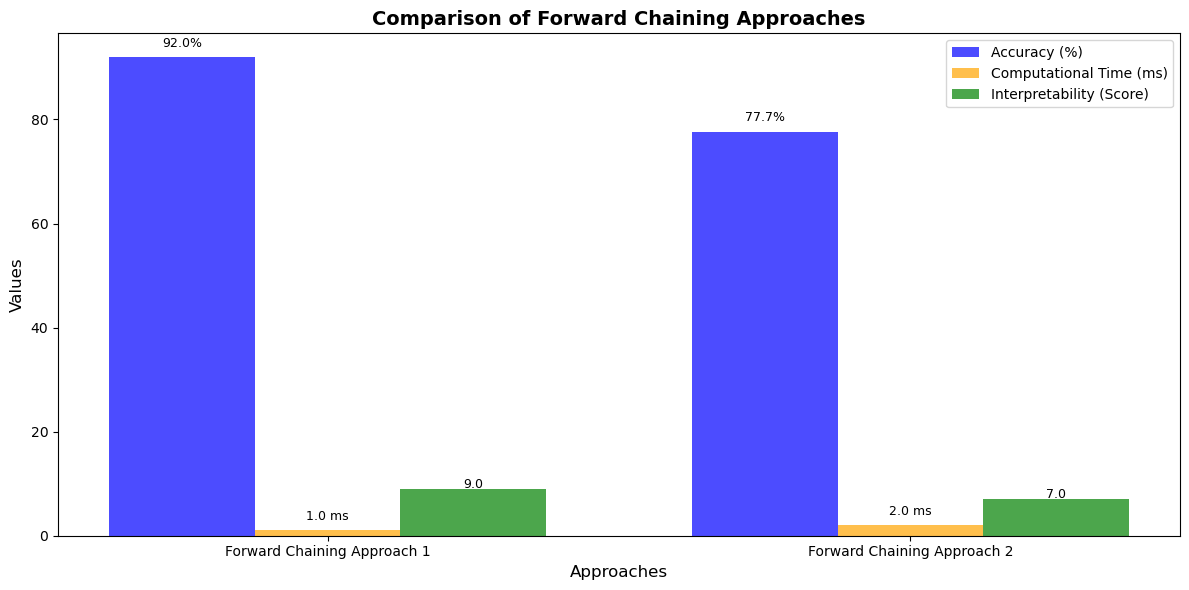

In [25]:
# Step 6: Visualize the Results in a Combined Bar Chart

# Metrics for visualization
approaches = ["Forward Chaining Approach 1", "Forward Chaining Approach 2"]
accuracy_values = [accuracy_v1 * 100, accuracy_v2 * 100]  # Accuracy in percentage
time_values = [time_v1 * 1000, time_v2 * 1000]  # Time in milliseconds
interpretability_scores = [9.0, 7.0]  # Example interpretability scores (customizable)

# Define bar width and positions
bar_width = 0.25
x = np.arange(len(approaches))

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width, accuracy_values, width=bar_width, label="Accuracy (%)", color='blue', alpha=0.7)
plt.bar(x, time_values, width=bar_width, label="Computational Time (ms)", color='orange', alpha=0.7)
plt.bar(x + bar_width, interpretability_scores, width=bar_width, label="Interpretability (Score)", color='green', alpha=0.7)

# Add labels and title
plt.xlabel("Approaches", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.title("Comparison of Forward Chaining Approaches", fontsize=14, fontweight='bold')
plt.xticks(x, approaches, fontsize=10)
plt.legend(fontsize=10)

# Add value annotations
for i in range(len(approaches)):
    plt.text(x[i] - bar_width, accuracy_values[i] + 2, f"{accuracy_values[i]:.1f}%", ha='center', fontsize=9)
    plt.text(x[i], time_values[i] + 2, f"{time_values[i]:.1f} ms", ha='center', fontsize=9)
    plt.text(x[i] + bar_width, interpretability_scores[i] + 0.2, f"{interpretability_scores[i]:.1f}", ha='center', fontsize=9)

# Adjust layout
plt.tight_layout()
plt.show()
